In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler



In [2]:
df = pd.read_excel(r'C:\Users\acer\Downloads\Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df1 = df[df.Country == 'United Kingdom']

In [5]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585.0,22466.0,FAIRY TALE COTTAGE NIGHT LIGHT,12.0,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586.0,22061.0,LARGE CAKE STAND HANGING STRAWBERY,8.0,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586.0,23275.0,SET OF 3 HANGING OWLS OLLIE BEAK,24.0,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586.0,21217.0,RED RETROSPOT ROUND CAKE TINS,24.0,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [6]:
df1.dropna(inplace = True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585.0,22466.0,FAIRY TALE COTTAGE NIGHT LIGHT,12.0,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586.0,22061.0,LARGE CAKE STAND HANGING STRAWBERY,8.0,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586.0,23275.0,SET OF 3 HANGING OWLS OLLIE BEAK,24.0,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586.0,21217.0,RED RETROSPOT ROUND CAKE TINS,24.0,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [8]:
df1 = df1[df1['Quantity']>0]

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
km = KMeans()

In [11]:
#df2 = df1[(df1['Quantity']<3000)& (df1['UnitPrice']<10000 )]

## Usually in customer segmentation we use a technique called RFM where,
R = Recency
F = Frequency
M = Monetary


In [12]:
#data preprocessing 
df1['CustomerID'] = df1['CustomerID'].astype(str)
df1['Total_amt'] = df1['Quantity']*df1['UnitPrice']


C:\Users\acer\AppData\Local\Temp/ipykernel_17400/3350200777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CustomerID'] = df1['CustomerID'].astype(str)
C:\Users\acer\AppData\Local\Temp/ipykernel_17400/3350200777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total_amt'] = df1['Quantity']*df1['UnitPrice']


In [13]:
df1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amt
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585.0,22466.0,FAIRY TALE COTTAGE NIGHT LIGHT,12.0,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586.0,22061.0,LARGE CAKE STAND HANGING STRAWBERY,8.0,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586.0,23275.0,SET OF 3 HANGING OWLS OLLIE BEAK,24.0,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586.0,21217.0,RED RETROSPOT ROUND CAKE TINS,24.0,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


## 1.Monetary

In [14]:
monetary = pd.DataFrame(df1.groupby('CustomerID')['Total_amt'].sum())


In [15]:
monetary.reset_index(inplace = True)
monetary.columns = ['CustomerID', 'Total_amt']
monetary

,CustomerID,Total_amt
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34
...,...,...
3916,18280.0,180.60
3917,18281.0,80.82
3918,18282.0,178.05
3919,18283.0,2094.88


## 2.Frequency

In [16]:
frequency = pd.DataFrame(df1.groupby('CustomerID')['InvoiceNo'].count())
frequency.reset_index(inplace = True)
frequency.columns = ['CustomerID', 'Frequency']
frequency

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4596
3,12749.0,199
4,12820.0,59
...,...,...
3916,18280.0,10
3917,18281.0,7
3918,18282.0,12
3919,18283.0,756


## 3. Recency

In [48]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(df1['InvoiceDate'])
df1['Diff'] = max_date - df1['InvoiceDate']
recency = df1.groupby('CustomerID')['Diff'].min()

recency.columns = ['CustomerID','Diff']


C:\Users\acer\AppData\Local\Temp/ipykernel_17400/3739148523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'],format='%d-%m-%Y %H:%M')
C:\Users\acer\AppData\Local\Temp/ipykernel_17400/3739148523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Diff'] = max_date - df1['InvoiceDate']


In [52]:
recency = pd.DataFrame(recency)

In [53]:
recency.reset_index(inplace = True)


In [57]:
recency['Diff'] = recency['Diff'].dt.days

In [58]:
recency

,CustomerID,Diff
0,12346.0,325
1,12747.0,1
2,12748.0,0
3,12749.0,3
4,12820.0,2
...,...,...
3916,18280.0,277
3917,18281.0,180
3918,18282.0,7
3919,18283.0,3


## Now we can join the three dataframes

In [59]:
dff = pd.merge(frequency,recency,on='CustomerID',how ='right' )



In [60]:
dff = pd.merge(dff,monetary,on='CustomerID',how ='right')

In [207]:
dff

,CustomerID,Frequency,Diff,Total_amt
0,12346.0,1,325,77183.60
1,12747.0,103,1,4196.01
2,12748.0,4596,0,33719.73
3,12749.0,199,3,4090.88
4,12820.0,59,2,942.34
...,...,...,...,...
3916,18280.0,10,277,180.60
3917,18281.0,7,180,80.82
3918,18282.0,12,7,178.05
3919,18283.0,756,3,2094.88


In [208]:
Q1 = dff.Total_amt.quantile(0.05)
Q3 = dff.Total_amt.quantile(0.95)
IQR = Q3 - Q1
DFF = dff[(dff.Total_amt>= Q1 - 1.5*IQR) & (dff.Total_amt<= Q3 + 1.5*IQR)]

Q1 = dff.Diff.quantile(0.05)
Q3 = dff.Diff.quantile(0.95)
IQR = Q3 - Q1
DFF = dff[(dff.Diff>= Q1 - 1.5*IQR) & (dff.Diff<= Q3 + 1.5*IQR)]

Q1 = dff.Frequency.quantile(0.05)
Q3 = dff.Frequency.quantile(0.95)
IQR = Q3 - Q1
DFF = dff[(dff.Frequency>= Q1 - 1.5*IQR) & (dff.Frequency<= Q3 + 1.5*IQR)]


In [209]:
DFF['CustomerID'] = dff['CustomerID']

C:\Users\acer\AppData\Local\Temp/ipykernel_17400/1376608903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFF['CustomerID'] = dff['CustomerID']


In [210]:
DFF.dropna(inplace = True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [211]:
DFF

,CustomerID,Frequency,Diff,Total_amt
0,12346.0,1,325,77183.60
1,12747.0,103,1,4196.01
3,12749.0,199,3,4090.88
4,12820.0,59,2,942.34
5,12821.0,6,213,92.72
...,...,...,...,...
3916,18280.0,10,277,180.60
3917,18281.0,7,180,80.82
3918,18282.0,12,7,178.05
3919,18283.0,756,3,2094.88


In [212]:
scaler = MinMaxScaler()

In [213]:
scale = pd.DataFrame(scaler.fit_transform(DFF.drop('CustomerID',axis = 1)))

### Scaled data

In [214]:
scale.columns = ['Frequency','Diff','Total_amt']

In [215]:
scale

,Frequency,Diff,Total_amt
0,0.000000,0.871314,0.297252
1,0.135099,0.002681,0.016160
2,0.262252,0.008043,0.015755
3,0.076821,0.005362,0.003629
4,0.006623,0.571046,0.000357
...,...,...,...
3890,0.011921,0.742627,0.000696
3891,0.007947,0.482574,0.000311
3892,0.014570,0.018767,0.000686
3893,1.000000,0.008043,0.008068


## Exploratory Data Analysis

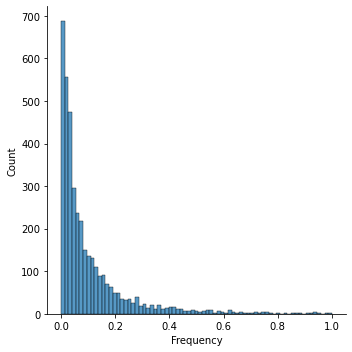

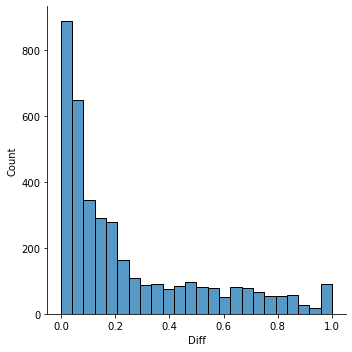

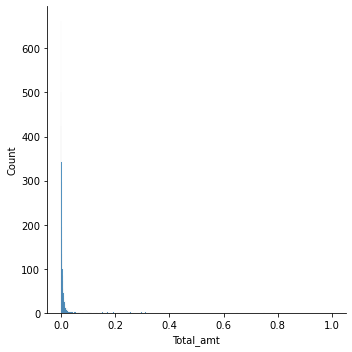

In [216]:
for i in scale.columns:
    sns.displot(scale[i])

## elbow plot and silhouette score

In [217]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k,max_iter = 50)
    km.fit(scale)
    sse.append(km.inertia_)

In [218]:
sse

[355.7157536784745,
 129.3610094955696,
 82.04266725206863,
 53.60163704905821,
 42.08909160048586,
 32.28140665048703,
 26.46543908661304,
 22.638517704524254,
 19.886652446759594]

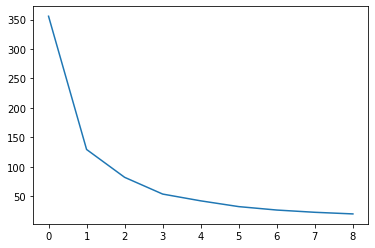

In [219]:
plt.plot(sse)

In [220]:
k_rng = range(2,10)

for k in k_rng:
    km = KMeans(n_clusters = k,max_iter = 50)
    km.fit(scale)
    label = km.labels_
    silhouette_avg = silhouette_score(scale, label)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6249363782503222
For n_clusters=3, the silhouette score is 0.5698564272556288
For n_clusters=4, the silhouette score is 0.542650027596256
For n_clusters=5, the silhouette score is 0.438227775510198
For n_clusters=6, the silhouette score is 0.45535036144954516
For n_clusters=7, the silhouette score is 0.44502362502045484
For n_clusters=8, the silhouette score is 0.43649825936723907
For n_clusters=9, the silhouette score is 0.4253801534652392


### Here we can select n value as 3 as generally n_cluster = 2 is avoidable
### Let's build the KMeans clustering model now

In [221]:
model = KMeans(n_clusters = 3,max_iter = 50)
model.fit(scale)
lbs = model.labels_
lbs

array([1, 0, 2, ..., 0, 2, 0])

In [222]:
DFF['Cluster_Id'] = lbs

C:\Users\acer\AppData\Local\Temp/ipykernel_17400/3987707310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFF['Cluster_Id'] = lbs


In [223]:
DFF

,CustomerID,Frequency,Diff,Total_amt,Cluster_Id
0,12346.0,1,325,77183.60,1
1,12747.0,103,1,4196.01,0
3,12749.0,199,3,4090.88,2
4,12820.0,59,2,942.34,0
5,12821.0,6,213,92.72,1
...,...,...,...,...,...
3916,18280.0,10,277,180.60,1
3917,18281.0,7,180,80.82,1
3918,18282.0,12,7,178.05,0
3919,18283.0,756,3,2094.88,2


<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

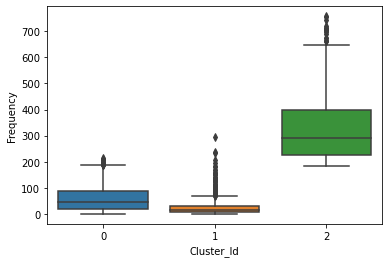

In [226]:
sns.boxplot(x= 'Cluster_Id',y ='Frequency',data =DFF)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Diff'>

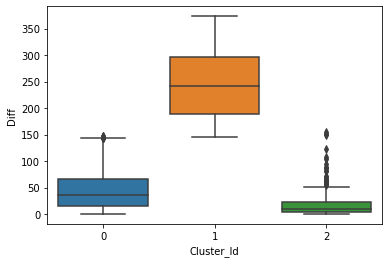

In [227]:
sns.boxplot(x= 'Cluster_Id',y ='Diff',data =DFF)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Total_amt'>

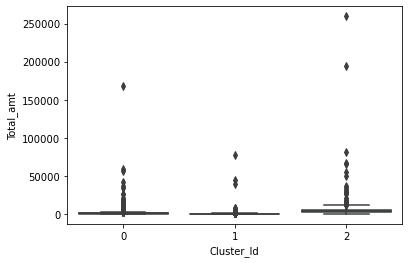

In [228]:
sns.boxplot(x = 'Cluster_Id',y ='Total_amt',data =DFF )

## Hence through RFM analysis we have clustered the data on the basis of Recency , Frequency and Monetary